# Assignment 2: Machine Learning with Scikit-Learn
**Iftekhar Rafi B00871031**

**Abdulla Sadoun B00900541**

## Question 0: Revisiting Your Dataset (A1Q1)

### a) Dataset Selection
For this assignment, We have selected the **CSE-CIC-IDS2018** dataset from the **Canadian Institute for Cybersecurity at the University of New Brunswick** also used for Assignment 1. This dataset is well-suited for analyzing **network intrusion detection**. Several methods of network intrusion have been explored in this research and subsequent dataset. I will be focusing on the dataset collected from **brute-force attack scenarios** as described in the research. The data is taken from their processed dataset for Wednesday, 14 February as described below.

#### Dataset Details
- **Source**: [CICIDS 2018 Dataset](https://www.unb.ca/cic/datasets/ids-2018.html)
- **Types of Attacks Covered**: Brute-force attacks (FTP and SSH)

| Attacker                     | Victim                          | Attack Name      | Date          | Attack Start Time | Attack Finish Time |
|------------------------------|---------------------------------|------------------|---------------|-------------------|--------------------|
| 172.31.70.4 (Valid IP:18.221.219.4) | 172.31.69.25 (Valid IP:18.217.21.148) | FTP-BruteForce   | Wed-14-02-2018 | 10:32             | 12:09              |
| 172.31.70.6 (Valid IP:13.58.98.64)  | 18.217.21.148- 172.31.69.25          | SSH-BruteForce   | Wed-14-02-2018 | 14:01             | 15:31              |


### b) Dataset Loading
The dataset was loaded into a Pandas DataFrame using the following code:




In [27]:
import pandas as pd
import numpy as np
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset
file_path = 'Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


### c) Description of the Dataset

The dataset consists of network traffic data collected on **February 14, 2018**, as part of the **CSE-CIC-IDS2018** dataset. It captures various network activities, including normal (benign) traffic and brute-force attacks targeting FTP and SSH services. The dataset includes **1,048,575 rows** and **80 columns**, each representing different characteristics of the network flows.

Here is a breakdown of the dataset:
- **Total Number of Records**: 1,048,575
- **Total Number of Features (Columns)**: 80
- **Types of Data**:
  - **Numeric Features**: Most of the columns are numeric, such as packet counts, flow durations, and packet sizes. These can help analyze the behavior of network traffic.
  - **Categorical Features**: The dataset includes a column labeled "Label," which identifies whether a given flow is benign or part of a specific attack type.

### Key Features in the Dataset
- **Flow Duration**: Measures how long a network flow lasted.
- **Total Forward and Backward Packets** (`Tot Fwd Pkts`, `Tot Bwd Pkts`): Counts the number of packets sent in the forward and backward directions.
- **Packet Length Statistics**: Provides information about the maximum, minimum, average, and standard deviation of packet lengths in both directions.
- **Flow Rate (`Flow Byts/s`, `Flow Pkts/s`)**: Indicates the number of bytes or packets transmitted per second during a flow.
- **Inter-Arrival Time**: Measures the time between consecutive packets.
- **Flags**: Various TCP flags, such as `SYN`, `ACK`, and `RST`, are used to indicate specific network conditions.
- **Active and Idle Times**: Represents the time intervals when the flow was actively transmitting data and when it was idle.

### Dataset Usage
The data can be used to detect and analyze network intrusions, specifically **brute-force attacks**. By examining patterns in traffic, such as sudden spikes in flow rates or repeated login attempts, it is possible to identify suspicious behaviors indicative of an ongoing attack.

### Example Records
Each row in the dataset represents a network flow, containing information like the flow's duration, the total number of packets, and the size of packets transmitted in both directions. The dataset also provides a label indicating whether the flow is normal (benign) or an attack.

Overall, this dataset is useful for tasks such as detecting brute-force attacks and understanding the characteristics of network traffic during different types of events.

## Question 1: Utilizing Machine Learning (15 points)

### Experiemting with 3 machine learning Models, for each model:
#### a) Train your models by applying an appropriate training/test split.  
#### b) If applicable to that model, explore how using regularization can improve it. 
#### c) For each model, create visuals that highlight interesting aspects of your model and the results. 
#### d) For classification models, obtain the classification report and the confusion matrix. Comment on the results. 5. If applicable, calculate and visualize feature importance.

We first started by preprocessing the data, we have tried running but have noticed that there are errors due to infinity and NaN values in X, so I replaced the infinite values that are outside of the float range with NaN and then used an imputer to replace the NaN values with averages.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Prepare the data
X = df.drop(columns=['Timestamp', 'Label'])
y = df['Label']

# infinity x values fix (replaced with nan)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with the mean of the column (filling nan values)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.25, stratify=y) # 75% training and 25% test (used by professor)

# Reducing the size to avoid vm crash
X_train, y_train = X_train[:100000], y_train[:100000]  # Use only the first 100k samples for training to avoid crashing

We have also came to the conclusion that given our limited hardware capabilites, we will not be able to use as big of a dataset as we thought we could, we have decided to work with 100k of the 1.5 Million data entries in the dataset.

### Logistic Regression Model

#### Short Description:
We chose to explore **Logistic Regression** as it is a widely used supervised learning algorithm, particularly effective for **binary classification** problems. Logistic Regression models the probability that a given input point belongs to a particular class using the **logistic (sigmoid) function**:

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

Where $z$ is a linear combination of the input features. Specifically, Logistic Regression estimates:

$$
P(y=1 | X) = \frac{1}{1 + e^{-(wX + b)}}
$$

Where:
- $w$ is the weight vector,
- $X$ is the feature vector,
- $b$ is the bias term.

This model predicts the class label based on whether the probability exceeds a threshold (typically 0.5).

---

#### a) Training our model with an appropriate train/test split:
We applied a 75/25 train-test split to our dataset, which we did using the following code:

This approach allows us to train on 75% of the data and test the model's performance on the remaining 25%.

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
# lr_model_1 = LogisticRegression(max_iter=1000)
# r_model_1 = LogisticRegression(max_iter=2000) # increased max_iter to 2000 to avoid convergence warning
#lr_model_1 = LogisticRegression(max_iter=2000, solver='saga') # Initialize the logistic regression model with increased max_iter and saga solver as 2000 didnt work
lr_model_1 = LogisticRegression(max_iter=1000, solver='liblinear') # trying this again after reducing the training data size 

# Train the model
lr_model_1.fit(X_train, y_train)

# Model Evaluation
accuracy = lr_model_1.score(X_test, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))

The test accuracy is 98.78 %



---

#### b) Using regularization to improve the model:
Regularization helps in preventing **overfitting**, especially when working with high-dimensional data. Logistic Regression supports two types of regularization:

- **L1 Regularization (Lasso)**: Adds a penalty based on the absolute value of coefficients:

  $$
  \lambda \sum_{j=1}^{n} |w_j|
  $$

- **L2 Regularization (Ridge)**: Adds a penalty based on the square of the coefficients:

  $$
  \lambda \sum_{j=1}^{n} w_j^2
  $$

We used **L2 regularization** by setting the penalty to `'l2'` as shown below:

By adding regularization, we can prevent our model from overfitting to the training data.

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model_l2 = LogisticRegression(max_iter=1000, solver='liblinear', penalty='l2')
lr_model_l2.fit(X_train, y_train)
# Model Evaluation
accuracy = lr_model_l2.score(X_test, y_test)
print('The test accuracy is {0:5.2f} %'.format(accuracy*100))


The test accuracy is 98.78 %


---
#### c) Creating visuals that highlight interesting aspects of our model:

To better understand our Logistic Regression model, we visualized the **confusion matrix**:



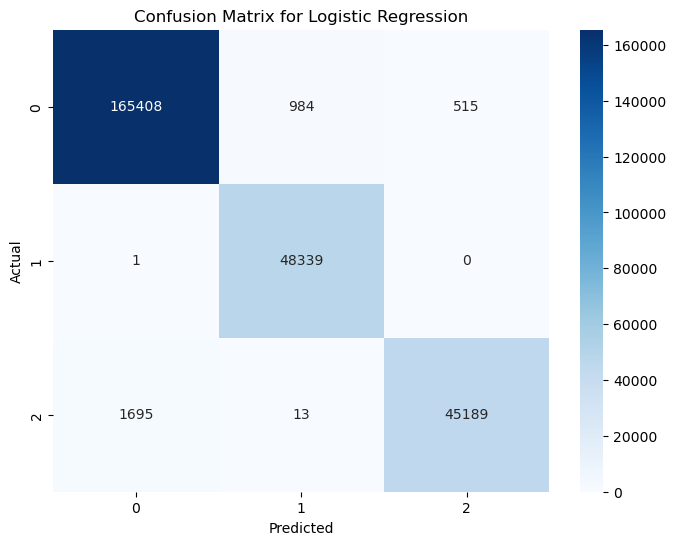

In [31]:
#Confusion Matrix** Heatmap:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = lr_model_1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
#### d) Classification report and confusion matrix:
We evaluated our model by generating a **classification report** and a **confusion matrix**, which summarize the performance across precision, recall, F1-score, and accuracy. This gives us a detailed view of how well the model performs across different metrics, and the confusion matrix allows us to visualize the true positives, false positives, true negatives, and false negatives.


In [32]:
# Predict on the test data
y_pred = lr_model_1.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

        Benign       0.99      0.99      0.99    166907
FTP-BruteForce       0.98      1.00      0.99     48340
SSH-Bruteforce       0.99      0.96      0.98     46897

      accuracy                           0.99    262144
     macro avg       0.99      0.98      0.99    262144
  weighted avg       0.99      0.99      0.99    262144

Confusion Matrix:
[[165408    984    515]
 [     1  48339      0]
 [  1695     13  45189]]



---

#### e) Feature importance:
In **Logistic Regression**, the coefficients of the model provide insights into feature importance. Larger coefficients (in absolute terms) indicate that the corresponding feature has a stronger impact on the prediction. To visualize feature importance, we used the following code:


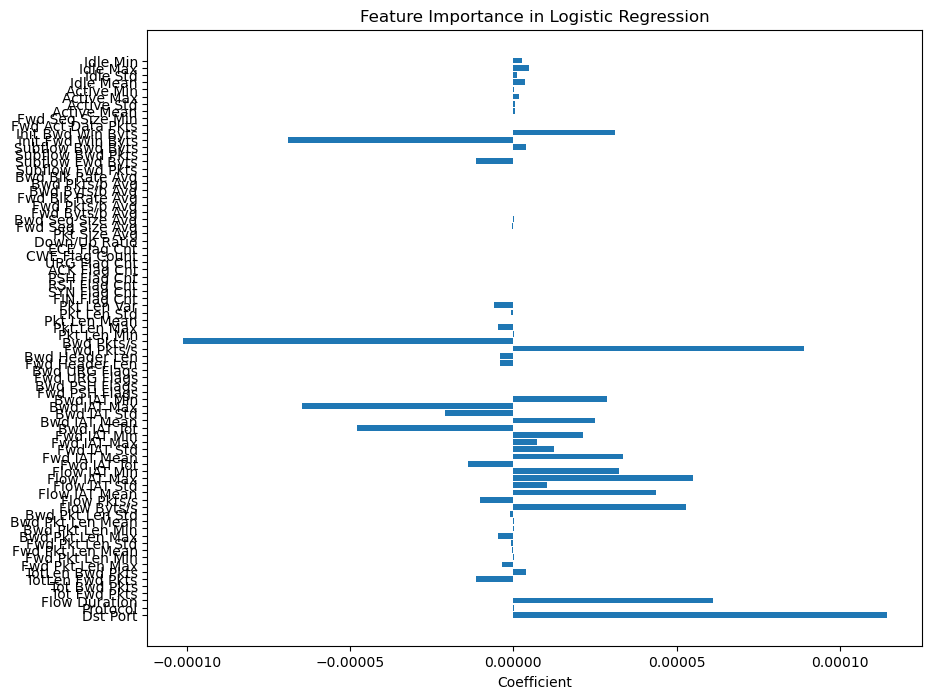

In [33]:
#This visualization helps us understand which features contribute the most to predicting the target class. The higher the coefficient, the more important the feature is in predicting the target class. 
# Get the coefficients from the model
coefficients = lr_model_1.coef_[0]
features = df.columns.drop(['Timestamp', 'Label'])

# Create a bar plot for feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient')
plt.show()


In [34]:
# from sklearn.linear_model import LinearRegression
# lr_model = LinearRegression() #uses the closed-form solution
# print(lr_model)
# lr_model.fit(X_train, y_train)
# y_pred = lr_model.predict(X_test)

---
### Random Forest Model

#### Short Description:
We used **Random Forest** because it is an ensemble learning method that builds multiple decision trees during training and merges their outputs to improve the predictive accuracy. Each tree is trained on a random subset of the data, and the final prediction is made by taking the majority vote for classification tasks. 

The formula for Random Forest can be expressed as:

$$
h(x) = \text{majority vote of}\ \{h_1(x), h_2(x), ..., h_B(x)\}
$$

Where $h_b(x)$ is the prediction from the $b^{th}$ decision tree, and $B$ is the total number of trees in the forest.

Random Forests are effective because they reduce overfitting by averaging the outputs of multiple trees, and they handle high-dimensional data well.

#### a) Train our model by applying an appropriate training/test split:

Similar to our approach with Logistic Regression, we used a **75/25 split** for training and testing:


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #Here, the model is trained with 100 trees (decision trees), as specified by `n_estimators=100`.


# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = rf_model.score(X_test, y_test)
print('The test accuracy of the Random Forest model is {0:5.2f} %'.format(accuracy_rf * 100))

The test accuracy of the Random Forest model is 100.00 %



---

#### b) Using regularization to improve the model:

In Random Forests, **regularization** is implicitly handled through mechanisms like:
- **Bootstrapping**: Each tree is trained on a random subset of the data.
- **Feature Randomness**: Each tree only considers a random subset of the features for splitting at each node.

While Random Forests don't explicitly use regularization terms like L1 or L2, we can control overfitting by adjusting hyperparameters like `max_depth`, `min_samples_split`, or `n_estimators`. For example, setting a maximum tree depth can prevent individual trees from becoming overly complex:



In [36]:
#By limiting the depth of trees, we prevent overfitting while still allowing the model to learn important patterns.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = rf_model.score(X_test, y_test)
print('The test accuracy of the Random Forest model is {0:5.2f} %'.format(accuracy_rf * 100))

The test accuracy of the Random Forest model is 100.00 %


#### c) Creating visuals that highlight interesting aspects of our model and the results:
- **Confusion Matrix Heatmap**:

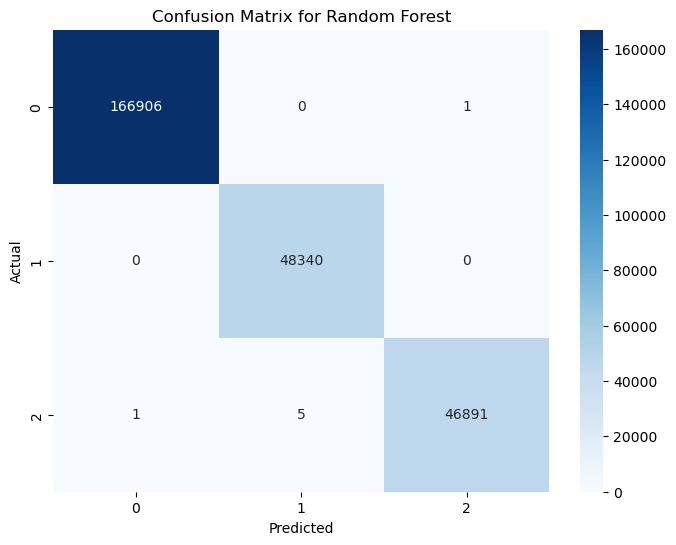

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


- **Feature Importance**:

Random Forests provide a feature importance measure based on how much a feature decreases the impurity in a tree. These visualizations help us interpret which features are contributing the most to the model's decisions.



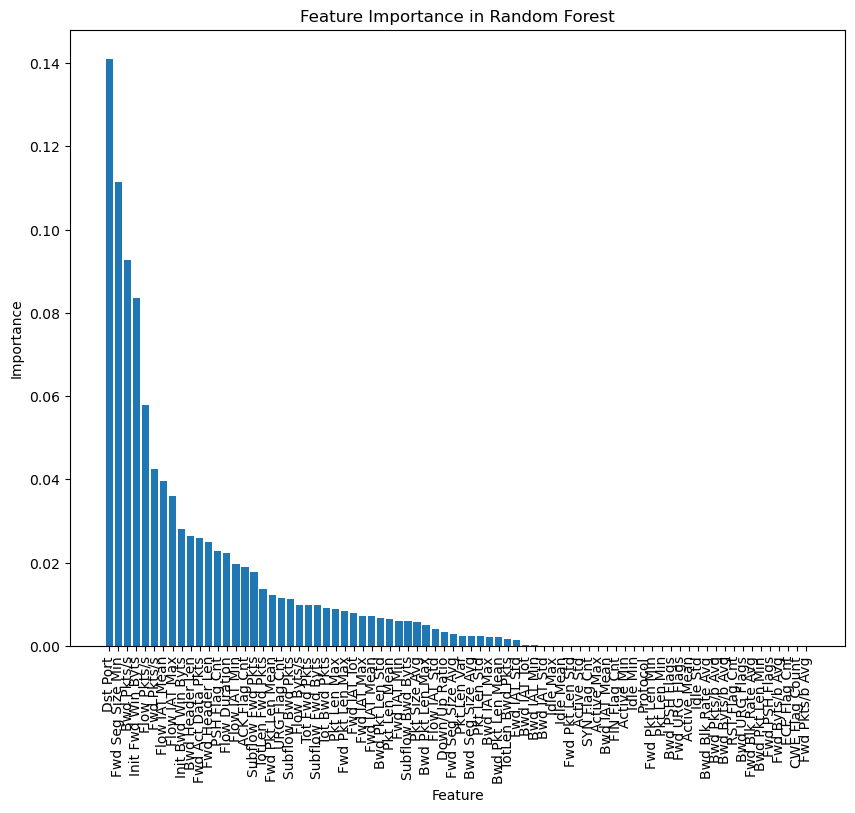

In [38]:
import numpy as np

# Get feature importance from the model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# List of feature names
feature_names = df.drop(columns=['Timestamp', 'Label']).columns

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


---

#### d) Classification report and confusion matrix:

We generated the classification report and confusion matrix for Random Forest to assess performance across precision, recall, F1-score, and accuracy:
The **classification report** provides us with detailed metrics, and the **confusion matrix** helps us visualize how well the model classified different classes.


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report for Random Forest:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00    166907
FTP-BruteForce       1.00      1.00      1.00     48340
SSH-Bruteforce       1.00      1.00      1.00     46897

      accuracy                           1.00    262144
     macro avg       1.00      1.00      1.00    262144
  weighted avg       1.00      1.00      1.00    262144

Confusion Matrix for Random Forest:
[[166906      0      1]
 [     0  48340      0]
 [     1      5  46891]]


#### e) Feature importance:

The Random Forest model provides feature importance scores directly. Features that result in large reductions in node impurity across the trees are considered more important.

We visualized the **feature importance** using the following code (as mentioned earlier):


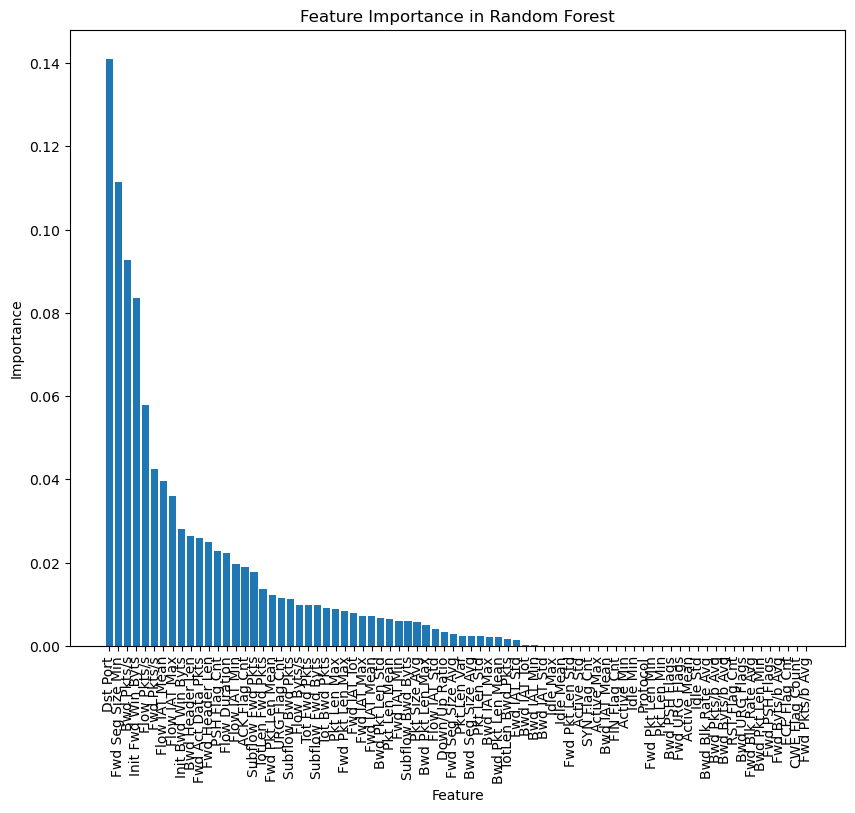

In [40]:
# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

---

### Support Vector Machine (SVM) Model

#### Short Description:
Support Vector Machines (SVMs) are powerful supervised learning models used for classification tasks, especially when the classes are not linearly separable. SVM works by finding the **hyperplane** that best separates the data points of different classes. In cases where the data is not linearly separable, **kernel functions** (such as `linear`, `rbf`, and `polynomial`) can be used to transform the input data into a higher-dimensional space where a hyperplane can separate the classes.

The decision boundary in SVM is chosen such that it maximizes the **margin** between the closest points of the two classes, called support vectors. The optimization problem solved by SVM is:

$$
\min_{w,b} \frac{1}{2} ||w||^2 \quad \text{subject to} \quad y_i(w^T x_i + b) \geq 1
$$

Where:
- $w$ is the weight vector,
- $b$ is the bias term,
- $x_i$ is a training data point, and
- $y_i$ is the class label of $x_i$.

#### a) Train our model by applying an appropriate training/test split:
We used a **75/25 train-test split** for the SVM model, as we did for other models.

Here’s the code to split the data and train the SVM model:

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', max_iter=1000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model

# Evaluate the model
svm_model = svm_model.score(X_test, y_test)
print('The test accuracy of the Support Vector Machine model is {0:5.2f} %'.format(svm_model * 100))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


The test accuracy of the Support Vector Machine model is 64.22 %



---

#### b) Using regularization to improve the model:
In SVM, regularization is controlled by the **C** parameter, which defines the trade-off between maximizing the margin and minimizing classification errors:

- **Low C**: Creates a larger margin, allowing some misclassifications. It leads to a simpler model (more regularization).
- **High C**: Forces the model to classify every point correctly, resulting in a smaller margin and a more complex model (less regularization).

Here's how we trained the model with different values of **C** to explore its effect on model performance:



For example, a **C** of 0.01 creates a wider margin (more regularization), while **C** = 10 makes the model fit the data more tightly (less regularization).


In [ ]:
# Train SVM with different regularization strength (C)
svm_model_high_C = SVC(kernel='linear', C=10, probability=True)
svm_model_high_C.fit(X_train, y_train)

# Train SVM with lower regularization (larger margin)
svm_model_low_C = SVC(kernel='linear', C=0.01, probability=True)
svm_model_low_C.fit(X_train, y_train)


---

#### c) Creating visuals that highlight interesting aspects of our model:

For SVM, we can visualize the **confusion matrix** and generate the **ROC curve** to assess the model’s performance.

- **Confusion Matrix Heatmap**:




import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:

# Generate predictions
y_pred = svm_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This visualizes the number of correct and incorrect classifications made by the SVM model.



- **ROC Curve**:

To generate the ROC curve for the SVM model, we need to get the predicted probabilities using the `predict_proba` method (which requires setting `probability=True` when initializing the model). Here's how we can compute and plot the ROC curve:



In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc='lower right')
plt.show()

This curve helps us evaluate the model’s ability to discriminate between the positive and negative classes.


---

#### d) Classification report and confusion matrix:

Here’s how we generated the classification report and confusion matrix to evaluate the model’s performance:


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion matrix
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


The **classification report** provides key metrics such as precision, recall, F1-score, and accuracy for each class. The **confusion matrix** shows how well the model predicted each class.



---

#### e) Feature importance:
SVMs don’t provide feature importance directly like Random Forest does. However, for **linear SVMs**, the model's coefficients can give insights into which features are most important in separating the classes.

Here’s how we can access the coefficients from a linear SVM and visualize their importance:


In [ ]:

# Get feature importance (coefficients) for a linear SVM
coefficients = svm_model.coef_[0]
features = df.columns  # Replace with actual feature names if needed

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)
plt.title('Feature Importance in SVM')
plt.xlabel('Coefficient')
plt.show()


In this case, the **magnitude** of the coefficients indicates the importance of each feature. A larger magnitude means the feature has more influence on the classification decision.

### K-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = knn_model.score(X_test, y_test)
print('The test accuracy of the K-Nearest Neighbors model is {0:5.2f} %'.format(accuracy_knn * 100))

print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix for K-Nearest Neighbors:")
print(confusion_matrix(y_test, y_pred_knn))

The test accuracy of the K-Nearest Neighbors model is 99.98 %
Classification Report for K-Nearest Neighbors:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00    166907
FTP-BruteForce       1.00      1.00      1.00     48340
SSH-Bruteforce       1.00      1.00      1.00     46897

      accuracy                           1.00    262144
     macro avg       1.00      1.00      1.00    262144
  weighted avg       1.00      1.00      1.00    262144

Confusion Matrix for K-Nearest Neighbors:
[[166872     12     23]
 [     0  48340      0]
 [     5      5  46887]]


### Linear Regression Section